In [9]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        lines=training_file.readlines()
        lines=lines[1:]
        labels=[]
        images=[]
        for i in lines:
            labels.append(int(i[0]))
            img=i[1:]
            img=img.split(',')[1:]
            img=np.array([(int)(i) for i in img])
            img=img.reshape((28,28))
            #print(img.shape)
            images.append(img)
        # Your code ends here
    images=np.array(images)
    labels=np.array(labels)
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [11]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images[:,:,:,np.newaxis]
testing_images =  testing_images[:,:,:,np.newaxis]

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
    )

validation_datagen = ImageDataGenerator(
    rescale=1/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [15]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
from tensorflow.keras import optimizers
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(9,activation='softmax')
])

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001),metrics=['acc'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images,training_labels,batch_size=10),
                             steps_per_epoch=(int)(training_images.shape[0] / 10), epochs=5,
                             validation_data=validation_datagen.flow(testing_images,testing_labels,batch_size=10),
                             validation_steps=(int)(testing_images.shape[0] / 10),
                             verbose=1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/5
2745/2745 [==============================] - 222s 81ms/step - loss: 1.5018 - acc: 0.4681 - val_loss: 1.1923 - val_acc: 0.5477
Epoch 2/5
2745/2745 [==============================] - 218s 79ms/step - loss: 1.1877 - acc: 0.5258 - val_loss: 0.8063 - val_acc: 0.6908
Epoch 3/5
2745/2745 [==============================] - 215s 78ms/step - loss: 0.9967 - acc: 0.6028 - val_loss: 0.6336 - val_acc: 0.7642
Epoch 4/5
2745/2745 [==============================] - 202s 74ms/step - loss: 0.8607 - acc: 0.6538 - val_loss: 0.5495 - val_acc: 0.7766
Epoch 5/5
2745/2745 [==============================] - 220s 80ms/step - loss: 0.7473 - acc: 0.7065 - val_loss: 0.5323 - val_acc: 0.7994


[140.04672802033136, 0.6638316]

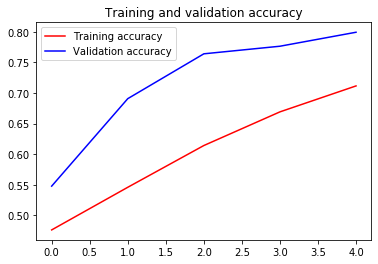

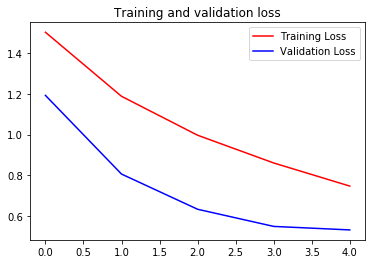

In [16]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
"""%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();"""

In [ ]:
"""%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);"""